In [1]:
# Provides ways to work with large multidimensional arrays
import numpy as np 
# Allows for further data manipulation and analysis
import pandas as pd
from pandas_datareader import data as web # Reads stock data 
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
%matplotlib inline

import datetime as dt # For defining dates
import mplfinance as mpf # Matplotlib finance

import time

# Used to get data from a directory
import os
from os import listdir
from os.path import isfile, join

In [31]:
# Define path to files
# For MacOS
# PATH = "/Users/derekbanas/Documents/Tutorials/Python for Finance/Stocks/"
# For Windows
PATH = "C:\\Users\\nafissaad\\Finance\\Stock List\\"

# Start date defaults
S_YEAR = 2017
S_MONTH = 1
S_DAY = 3
S_DATE_STR = "2017-01-03"
S_DATE_DATETIME = dt.datetime(S_YEAR, S_MONTH, S_DAY)

# End date defaults
E_YEAR = 2022
E_MONTH = 1
E_DAY = 27
E_DATE_STR = "2022-01-27"
E_DATE_DATETIME = dt.datetime(E_YEAR, E_MONTH, E_DAY)

In [3]:
files = [x for x in listdir(PATH) if isfile(join(PATH, x))]
tickers = [os.path.splitext(x)[0] for x in files]
tickers

# On MacOS Only
# tickers.remove('.DS_Store')
tickers.sort()
tickers

['A',
 'AA',
 'AAL',
 'AAME',
 'AAN',
 'AAOI',
 'AAON',
 'AAP',
 'AAPL',
 'AAT',
 'AAWW',
 'ABBV',
 'ABC',
 'ABCB',
 'ABEO',
 'ABG',
 'ABIO',
 'ABM',
 'ABMD',
 'ABR',
 'ABT',
 'ABTX',
 'AC',
 'ACA']

In [4]:
# Function that SAVES DataFrame to CSV
# Reads a dataframe from the CSV file, changes index to date and returns it
def get_df_from_csv(ticker):
    # Try to get the file and if it doesn't exist issue a warning
    try:
        df = pd.read_csv(PATH + ticker + '.csv')
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        return df

In [5]:
def save_dataframe_to_csv(df, ticker):
    df.to_csv(PATH + ticker + '.csv',index=False)

In [6]:
# Return Valid_dates(df, sdate)
def get_valid_dates(df, sdate, edate):
    
    try:
        mask = (df['Date'] > sdate) & (df['Date'] <= edate) 
        sm_df = df.loc[mask]
        sm_df = sm_df.set_index(['Date'])
    
        # Get smallest date that matches
        sm_date = sm_df.index.min()
        last_date = sm_df.index.max()
    
        # Add leading zeros to date
        # Split string on - and if a number is less than 2 add a zero in front
        date_leading = '-'.join(('0' if len(x)<2 else '')+x for x in sm_date.split('-'))#your dates could be market holiday, so it will skip the weekends and get you very first opening date
        date_ending = '-'.join(('0' if len(x)<2 else '')+x for x in last_date.split('-'))
        print(date_leading, " ", date_ending)
    except Exception:
        print("Date Corrupted")
    else:
        return date_leading, date_ending

In [7]:
#Returns Return on Investment over time
def roi_between_dates(df, sdate, edate):
    
    try:
        # Gets the Adj Close price for 1st & last date 
        start_val = df.loc[sdate,'Adj Close'] 
        end_val = df.loc[edate,'Adj Close']
        roi = ((end_val - start_val) / start_val)
    except Exception:
        print("Data Corrupted")
    else:
        return roi
        

In [8]:
#Get Means Betwwen Dates
def get_mean_between_dates(df, sdate, edate):
    mask = (df['Date'] > sdate) & (df['Date'] <= edate)
    return df.loc[mask]["Adj Close"].mean()

In [9]:
def get_std_between_dates(df, sdate, edate):
    mask = (df['Date'] > sdate) & (df['Date'] <= edate)
    return df.loc[mask]["Adj Close"].std()


In [10]:
#get Coefficient of Variation Betwwen dates
def get_cov_between_dates(df, sdate, edate):
    mean = get_mean_between_dates(df, sdate, edate)
    sd = get_std_between_dates(df, sdate, edate)
    return sd / mean

In [11]:
tickers[1]

'AA'

In [12]:
stock_a = get_df_from_csv(tickers[0])
stock_a

,Date,Adj Close,daily_return
0,2017-01-03,44.659351,NaN
1,2017-01-04,45.245338,0.013121
2,2017-01-05,44.707386,-0.011890
3,2017-01-06,46.100292,0.031156
4,2017-01-09,46.244381,0.003126
...,...,...,...
1270,2022-01-19,140.429993,-0.000285
1271,2022-01-20,139.479996,-0.006765
1272,2022-01-21,137.509995,-0.014124
1273,2022-01-24,138.119995,0.004436


In [13]:
# Get the first and last valid date in the date range
print(get_valid_dates(stock_a, '2021-01-01', '2022-01-25'))
sdate, edate = get_valid_dates(stock_a, '2021-01-01', '2022-01-25')
sdate
edate

print("Adj Close Mean :", get_mean_between_dates(stock_a, sdate, edate))
print("Adj Close Standard Deviation :", get_std_between_dates(stock_a, sdate, edate))
print("Adj Close Coefficient of Variation :", get_cov_between_dates(stock_a, sdate, edate))

stock_a = stock_a.set_index(['Date'])
stock_a

print("Return on Investment since 2017:", roi_between_dates(stock_a, sdate, edate))

2021-01-04   2022-01-25
('2021-01-04', '2022-01-25')
2021-01-04   2022-01-25
Adj Close Mean : 144.32330299406016
Adj Close Standard Deviation : 16.239141537132543
Adj Close Coefficient of Variation : 0.11251919267535672
Return on Investment since 2017: 0.14040734819065362


In [14]:
#Cov and Roi for all stocks Over DEfined Period
def get_cov_ror(tickers,sdate,edate):
    col_names = ['Ticker','COV','ROI']
    df = pd.DataFrame(columns=col_names)
    for ticker in tickers:
        print("Working on :", ticker)
        s_df =get_df_from_csv(ticker)
        s_date,e_date=get_valid_dates(s_df,sdate,edate)
        cov =get_cov_between_dates(s_df,s_date,e_date)
        s_df=s_df.set_index(['Date'])
        roi = roi_between_dates(s_df,s_date,e_date)
        df.loc[len(df.index)] = [ticker,cov,roi]
    return df

In [15]:
market_df=get_cov_ror(tickers,'2021-01-01','2022-01-25')

Working on : A
2021-01-04   2022-01-25
Working on : AA
2021-01-04   2022-01-25
Working on : AAL
2021-01-04   2022-01-25
Working on : AAME
2021-01-04   2022-01-25
Working on : AAN
2021-01-04   2022-01-25
Working on : AAOI
2021-01-04   2022-01-25
Working on : AAON
2021-01-04   2022-01-25
Working on : AAP
2021-01-04   2022-01-25
Working on : AAPL
2021-01-04   2022-01-25
Working on : AAT
2021-01-04   2022-01-25
Working on : AAWW
2021-01-04   2022-01-25
Working on : ABBV
2021-01-04   2022-01-25
Working on : ABC
2021-01-04   2022-01-25
Working on : ABCB
2021-01-04   2022-01-25
Working on : ABEO
2021-01-04   2022-01-25
Working on : ABG
2021-01-04   2022-01-25
Working on : ABIO
2021-01-04   2022-01-25
Working on : ABM
2021-01-04   2022-01-25
Working on : ABMD
2021-01-04   2022-01-25
Working on : ABR
2021-01-04   2022-01-25
Working on : ABT
2021-01-04   2022-01-25
Working on : ABTX
2021-01-04   2022-01-25
Working on : AC
2021-01-04   2022-01-25
Working on : ACA
2021-01-04   2022-01-25


In [16]:
market_df

,Ticker,COV,ROI
0,A,0.112519,0.140407
1,AA,0.273797,1.638438
2,AAL,0.115903,0.087905
3,AAME,0.189896,0.197811
4,AAN,0.165350,0.199779
5,AAOI,0.232182,-0.549087
6,AAON,0.079847,0.025967
7,AAP,0.122992,0.485825
8,AAPL,0.113409,0.242292
9,AAT,0.098063,0.337557


In [17]:
#if you want to remove any problamatic stok from your ticker list use this
#tickers.remove("ticker_name")

In [18]:
market_df.sort_values(by=['ROI'],ascending=False)

,Ticker,COV,ROI
1,AA,0.273797,1.638438
7,AAP,0.122992,0.485825
10,AAWW,0.162362,0.411446
12,ABC,0.066732,0.378905
13,ABCB,0.075665,0.365119
19,ABR,0.100195,0.351670
21,ABTX,0.067245,0.351330
9,AAT,0.098063,0.337557
11,ABBV,0.083456,0.336884
22,AC,0.077851,0.332565


In [19]:
def merge_df_by_column_name(col_name,sdate,edate,*ticker):
    mult_df = pd.DataFrame()
    for x in ticker:
        df = get_df_from_csv(x)
        df['Date'] = pd.to_datetime(df['Date'])
        mask = (df['Date'] >= sdate) & (df['Date'] <= edate)
        mult_df[x] = df.loc[mask][col_name]
    return mult_df

Correlation Matrix using FAANGS

In [20]:
#Correlation tells us how closely 2 stocks return move togather
#Correlation is  a standardized value lying betwwen -1 and 1
#when this value is grater that 0.5 we say that these stocks are strongly correlated
# 0 means no correlation 
faang_list =tickers
mult_df =merge_df_by_column_name('Adj Close','2020-1-1','2020-12-31',*tickers)
mult_df=mult_df.drop(['AAN','AAL'],axis=1)

In [21]:
mult_df.corr()

,A,AA,AAME,AAOI,AAON,AAP,AAPL,AAT,AAWW,ABBV,...,ABEO,ABG,ABIO,ABM,ABMD,ABR,ABT,ABTX,AC,ACA
A,1.000000,0.742792,0.020931,0.096643,0.915999,0.822904,0.939835,-0.206445,0.845110,0.781476,...,-0.545895,0.904593,0.081515,0.726334,0.832597,0.701669,0.906139,0.241725,0.058190,NaN
AA,0.742792,1.000000,0.176453,0.226094,0.695581,0.719275,0.618633,0.398997,0.374241,0.701803,...,-0.234505,0.888123,0.104888,0.796671,0.459501,0.888658,0.501070,0.733316,0.392021,NaN
AAME,0.020931,0.176453,1.000000,-0.341535,0.181834,-0.092016,0.015195,0.231710,-0.131691,-0.127919,...,-0.238978,0.174679,-0.456343,-0.071183,-0.228089,0.322802,-0.116306,0.386407,-0.046103,NaN
AAOI,0.096643,0.226094,-0.341535,1.000000,0.101914,0.447815,0.137177,0.337100,0.174429,0.106445,...,0.359091,0.244022,0.462560,0.457355,0.302862,0.271234,0.124030,0.129629,0.588798,NaN
AAON,0.915999,0.695581,0.181834,0.101914,1.000000,0.768650,0.867531,-0.100422,0.779542,0.733210,...,-0.473173,0.877585,0.082085,0.694705,0.767561,0.727425,0.796359,0.301424,0.109068,NaN
AAP,0.822904,0.719275,-0.092016,0.447815,0.768650,1.000000,0.805787,0.068103,0.743996,0.735039,...,-0.201051,0.845164,0.345843,0.877532,0.786883,0.759626,0.761814,0.288377,0.357334,NaN
AAPL,0.939835,0.618633,0.015195,0.137177,0.867531,0.805787,1.000000,-0.341757,0.916169,0.709727,...,-0.546702,0.833761,0.044983,0.660685,0.906422,0.609057,0.918897,0.057776,-0.026062,NaN
AAT,-0.206445,0.398997,0.231710,0.337100,-0.100422,0.068103,-0.341757,1.000000,-0.539071,-0.032878,...,0.402217,0.130725,0.134542,0.346024,-0.434687,0.488980,-0.391049,0.818395,0.684098,NaN
AAWW,0.845110,0.374241,-0.131691,0.174429,0.779542,0.743996,0.916169,-0.539071,1.000000,0.590004,...,-0.495772,0.667778,0.115802,0.516319,0.913839,0.387074,0.894385,-0.209318,-0.148739,NaN
ABBV,0.781476,0.701803,-0.127919,0.106445,0.733210,0.735039,0.709727,-0.032878,0.590004,1.000000,...,-0.056813,0.728156,0.308991,0.711387,0.713900,0.559298,0.657232,0.235324,0.208934,NaN


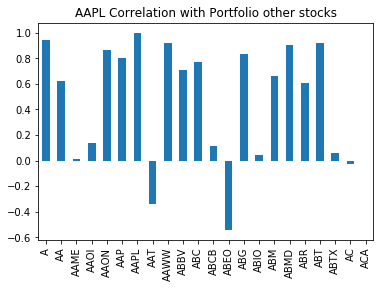

In [22]:
mult_df.corr()['AAPL'].plot(kind='bar')
plt.title('AAPL Correlation with Portfolio other stocks')
plt.show()

In [23]:
#Variance is a measure of how spread out a data set is
mult_df['AAPL'].var()

476.0978980510068

In [24]:
days=len(mult_df.index)
days

253

In [25]:
tv=mult_df['AAPL'].var()*days
print('Our True variance :',tv)

Our True variance : 120452.76820690472


In [26]:
#Coefficient of variance is i a measure to calculate variance relationship between two stock
mult_df.cov()*253

,A,AA,AAME,AAOI,AAON,AAP,AAPL,AAT,AAWW,ABBV,...,ABEO,ABG,ABIO,ABM,ABMD,ABR,ABT,ABTX,AC,ACA
A,47864.027821,11773.346199,16.457294,731.526500,18945.914744,52557.036268,71361.596672,-5087.745641,43762.540874,23220.944636,...,-1387.714179,78031.418200,497.777531,10780.911674,163143.090624,6578.661692,34303.289917,4251.648324,843.256889,NaN
AA,11773.346199,5248.754314,45.942289,566.726737,4764.218229,15212.481848,15554.993800,3256.221946,6417.476009,6905.628494,...,-197.408656,25369.555218,212.103110,3915.808714,29815.636786,2759.075804,6281.490675,4271.199661,1881.223139,NaN
AAME,16.457294,45.942289,12.915556,-42.466649,61.779965,-96.538203,18.951872,93.803305,-112.020088,-62.438480,...,-9.979311,247.519821,-45.776133,-17.355946,-734.158659,49.715688,-72.325858,111.643251,-10.974694,NaN
AAOI,731.526500,566.726737,-42.466649,1197.050842,333.352948,4523.061773,1647.193214,1313.803907,1428.428580,500.197063,...,144.360169,3328.873007,446.699579,1073.554967,9384.914830,402.161794,742.540898,360.569284,1349.353980,NaN
AAON,18945.914744,4764.218229,61.779965,333.352948,8937.818808,21213.947066,28464.870147,-1069.452395,17443.750425,9414.639011,...,-519.782335,32712.734455,216.607024,4455.849290,64991.753289,2947.168150,13027.486198,2290.997906,682.991496,NaN
AAP,52557.036268,15212.481848,-96.538203,4523.061773,21213.947066,85222.550647,81640.520757,2239.530174,51408.188347,29143.878610,...,-681.976978,97281.414953,2818.040565,17380.193660,205739.008442,9503.373551,38482.436370,6768.133537,6909.638327,NaN
AAPL,71361.596672,15554.993800,18.951872,1647.193214,28464.870147,81640.520757,120452.768207,-13361.092115,75260.719903,33454.853712,...,-2204.678283,114093.691476,435.763665,15556.694441,281752.847493,9058.728717,55183.799019,1612.088230,-599.124715,NaN
AAT,-5087.745641,3256.221946,93.803305,1313.803907,-1069.452395,2239.530174,-13361.092115,12689.139524,-14372.982561,-503.019604,...,526.456879,5806.122621,423.023740,2644.458014,-43855.338955,2360.523638,-7622.261431,7411.556901,5104.321006,NaN
AAWW,43762.540874,6417.476009,-112.020088,1428.428580,17443.750425,51408.188347,75260.719903,-14372.982561,56023.358669,18967.013806,...,-1363.493266,62320.095416,765.051585,8291.193798,193724.191814,3926.262779,36630.693051,-3983.098464,-2331.921447,NaN
ABBV,23220.944636,6905.628494,-62.438480,500.197063,9414.639011,29143.878610,33454.853712,-503.019604,18967.013806,18446.719608,...,-89.658487,38993.824724,1171.376545,6555.107411,86841.277148,3255.394520,15445.938368,2569.550830,1879.630527,NaN


In [27]:
port_list = ['AAPL','AAL']
port_df = merge_df_by_column_name('daily_return','2020-1-1','2020-12-31',*port_list)
port_df

,AAPL,AAL
754,0.022816,0.014296
755,-0.009722,-0.049502
756,0.007968,-0.011935
757,-0.004703,-0.003660
758,0.016086,0.022777
...,...,...
1002,0.007712,-0.014475
1003,0.035766,0.025543
1004,-0.013315,-0.012453
1005,-0.008527,0.018285


In [28]:
port_df.corr()

,AAPL,AAL
AAPL,1.000000,0.247757
AAL,0.247757,1.000000


In [29]:
price_df = merge_df_by_column_name('Adj Close','2020-1-1','2020-12-31',*port_list)
price_df

,AAPL,AAL
754,73.988472,28.982893
755,73.269157,27.548195
756,73.852982,27.219410
757,73.505646,27.119778
758,74.688072,27.737495
...,...,...
1002,131.161407,15.660000
1003,135.852509,16.059999
1004,134.043655,15.860000
1005,132.900696,16.150000


In [30]:
AAPL_start_price=price_df.iloc[0][0]
AAL_start_price=price_df.iloc[0][1]
Total_value_of_our_portfolio=418.48
AAPLE_stock_weight=AAPL_start_price/Total_value_of_our_portfolio
AAL_stock_weight=AAL_start_price/Total_value_of_our_portfolio
AAPL_weight=.50
AAL_WEight=.50
wts=np.array([AAPL_weight,AAL_WEight])
port_var =np.dot(wts.T,np.dot(port_df.cov()*253,wts))
print("profolio Var :",port_var)
print("AAPL VAR :",port_df["AAPL"].var()*253)
print("AAL VAR :",port_df["AAL"].var()*253)

profolio Var : 0.3873910149248458
AAPL VAR : 0.21848304852614236
AAL VAR : 1.0893415343926411
